         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN          NaN  
1  13.3  47.7  0

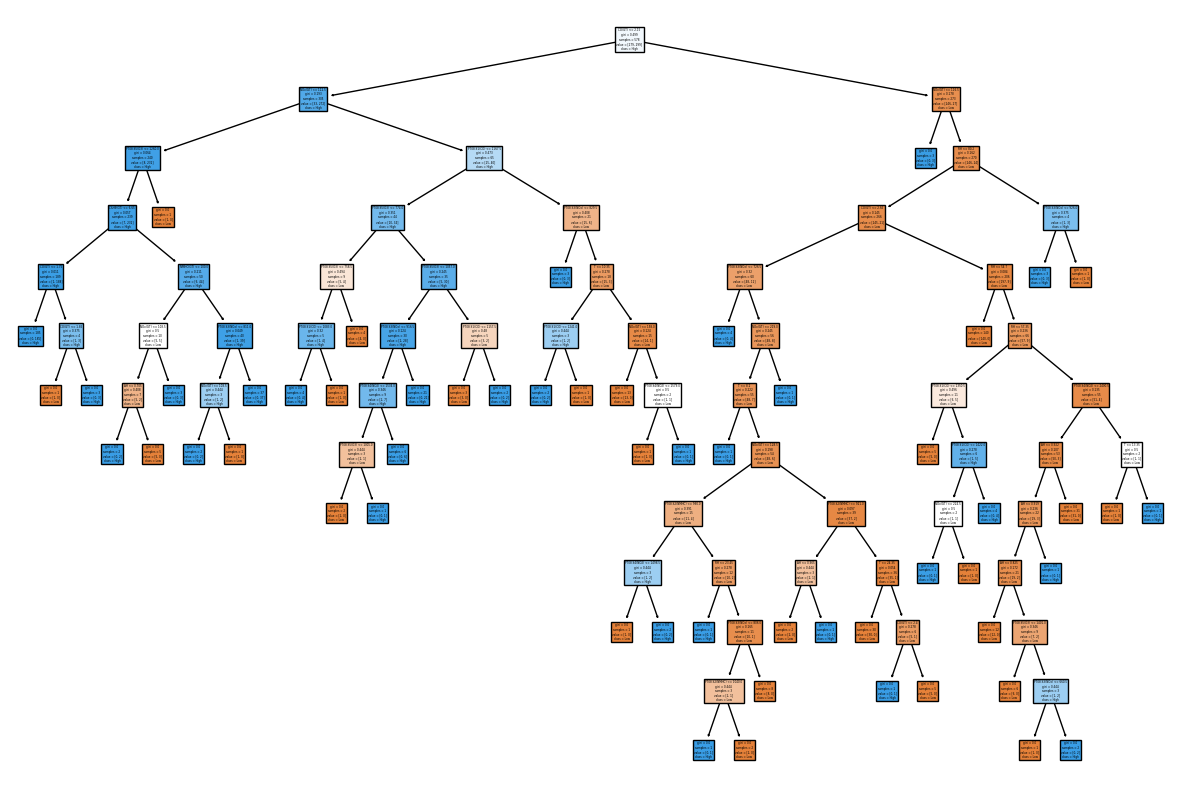

Model Accuracy: 87.15%


In [34]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Load the Air Quality dataset (downloaded from UCI Machine Learning Repository)
# dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip'
# Unzip the dataset and load it
air_quality_data = pd.read_csv('AirQuality.csv', sep=';', decimal=',', na_values=-200)

# Display the first few rows to understand the dataset
print(air_quality_data.head())

# Select relevant columns for analysis (Example: Concentrations of pollutants and meteorological data)
columns = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'PT08.S2(NMHC)',
           'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
air_quality_data = air_quality_data[columns]

# Handle missing values by dropping rows with NaN values
air_quality_data.dropna(inplace=True)

# Define target variable (example: Assume we want to predict 'Air Quality' as high or low based on NO2 levels)
air_quality_data['Air_Quality'] = ['High' if x > 100 else 'Low' for x in air_quality_data['NO2(GT)']]
air_quality_data.drop('NO2(GT)', axis=1, inplace=True)

# Split dataset into features (X) and target (y)
X = air_quality_data.drop('Air_Quality', axis=1)
y = air_quality_data['Air_Quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
tree.plot_tree(decision_tree, feature_names=X.columns, class_names=['Low', 'High'], filled=True)
plt.show()

# Evaluate the model
accuracy = decision_tree.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


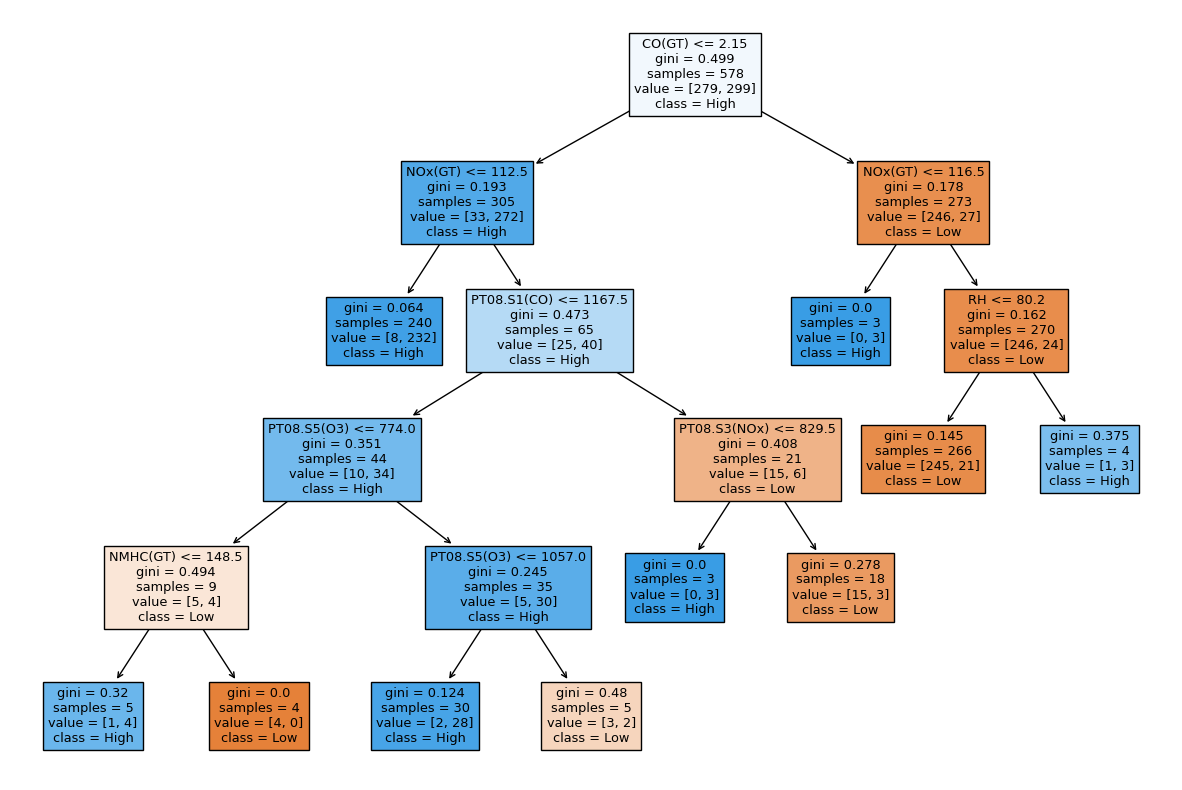

Model Accuracy (with limited nodes): 89.56%


In [36]:
# prompt: shrink the node upto 10

import matplotlib.pyplot as plt
# Train the Decision Tree Classifier with max_leaf_nodes set to 10
decision_tree = DecisionTreeClassifier(random_state=42, max_leaf_nodes=10)
decision_tree.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
tree.plot_tree(decision_tree, feature_names=X.columns, class_names=['Low', 'High'], filled=True)
plt.show()

# Evaluate the model
accuracy = decision_tree.score(X_test, y_test)
print(f"Model Accuracy (with limited nodes): {accuracy * 100:.2f}%")
